In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [10]:
#โหลด csv เข้าไปใน Python Pandas
df = pd.read_csv('train.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [11]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['Low Fat', 'Regular', 'reg', 'low fat'],['LF','REG','REG','LF'])
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,LF,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,REG,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,LF,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,REG,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,LF,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,LF,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,REG,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,LF,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,REG,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [12]:
df['Outlet_Establishment_Year'] = df['Outlet_Establishment_Year'].astype('object')

In [13]:
#เช็คว่ามีข้อมูลที่หายไปไหม ถ้าเป็นตัวเลขให้ใส่ด้วยค่าเฉลี่ย ถ้าเป็น Categorical ให้ใส่ด้วย Category อันที่มีความถี่สูงที่สุด
avg = df['Item_Weight'].mean()
avg

12.857645184136183

In [14]:
df['Item_Weight'].fillna(value=avg, inplace=True)
df['Outlet_Size'].fillna(value='Medium', inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   object 
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), object(8)
memory usage: 799.2+ KB


In [17]:
df.drop(['Item_Identifier','Outlet_Identifier'], axis=1, inplace=True)
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,LF,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,REG,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,LF,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,REG,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.930,LF,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,LF,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,REG,0.046982,Baking Goods,108.1570,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,10.600,LF,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,REG,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [18]:
#32 ทำ dummies สำหรับ Categorical data และ สร้าง train/test split ด้วย 80:20 ratio
df_new = pd.get_dummies(df, drop_first=True)
df_new

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_REG,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.016047,249.8092,3735.1380,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
1,5.920,0.019278,48.2692,443.4228,1,0,0,0,0,0,...,0,0,1,1,0,0,1,0,1,0
2,17.500,0.016760,141.6180,2097.2700,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,19.200,0.000000,182.0950,732.3800,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,8.930,0.000000,53.8614,994.7052,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,2778.3834,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
8519,8.380,0.046982,108.1570,549.2850,1,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
8520,10.600,0.035186,85.1224,1193.1136,0,0,0,0,0,0,...,1,0,0,0,1,1,0,1,0,0
8521,7.210,0.145221,103.1332,1845.5976,1,0,0,0,0,0,...,0,0,1,1,0,0,1,0,1,0


In [21]:
X = df_new['Item_MRP']
y = df_new['Item_Outlet_Sales']

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=70)

In [98]:
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)

In [31]:
#33 สร้างโมเดลแบบ Simple Linear Regression โดยใช้ Item_MRP เป็น independent variable เพียงตัวเดียว
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
#34 แสดงค่า intercept และ coefficient พร้อมกับอธิบายทั้งสองค่าว่าคืออะไรและหมายความว่าอย่างไร
print('intercept=',lm.intercept_)
print('coefficient=', lm.coef_)

intercept= -18.584559904657453
coefficient= [15.62902149]


In [36]:
#Ans ค่า intercept คือจุดตัดแกน Y, ค่าcoefficient คือ ค่าความชัน 

In [37]:
#35 ทดสอบโมเดลวัดค่า MAE, MSE, RMSE และ R2
pred = lm.predict(X_test)
pred

array([3596.38310532, 2923.13174641, 1460.56166335, ..., 2995.43785145,
       1524.60001602, 1242.08044608])

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [43]:
print('MAE: ', mean_absolute_error(y_test, pred))
print('MSE: ', mean_squared_error(y_test, pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, pred)))
print('R2 score: ', r2_score(y_test, pred))

MAE:  1027.776764911261
MSE:  1991606.813855202
RMSE:  1411.243003120016
R2 score:  0.31556802434435205


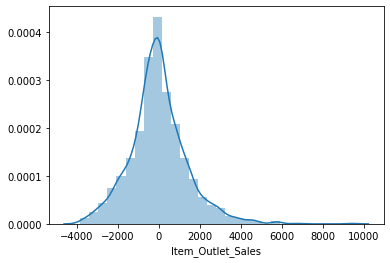

In [44]:
#36 สร้าง distribution plot ของผลต่างระหว่าง y_test กับ predicted results และอธิบายความหมาย
sns.distplot((y_test - pred), bins=30)

In [45]:
dict_compare ={'Sale':y_test, 'Predicted':pred}
df_compare = pd.DataFrame(dict_compare)
df_compare

,Sale,Predicted
5673,3243.7776,3596.383105
1284,3014.7424,2923.131746
5186,2799.6890,1460.561663
4548,1328.2710,985.595700
337,6410.3224,3447.082189
...,...,...
250,306.2680,2357.558094
2696,2656.5420,1368.512978
510,774.9912,2995.437851
4412,492.6920,1524.600016


In [47]:
print(df_compare.to_string())

            Sale    Predicted
5673   3243.7776  3596.383105
1284   3014.7424  2923.131746
5186   2799.6890  1460.561663
4548   1328.2710   985.595700
337    6410.3224  3447.082189
5942   1211.7560  1450.731009
4749    908.1512  1276.423658
8282   1640.5312   912.755083
1110   2237.0880  2281.057160
6647    379.5060  2926.751428
4370   1846.9292  1497.536802
5615   2375.5744  2272.214259
5607   3691.1952  2372.652603
6150    595.2252  3069.841371
6870   3235.7880  1698.413490
5656    516.6608  1993.889519
6585   1922.8304  1589.666758
3888    759.0120   558.917162
6239    656.4788   577.137475
3196   1603.9122  2288.418429
738    4362.3216  2575.545434
7613   1725.7536  1678.095762
1840   1037.3164   806.559007
8060    143.8128  2247.823608
7876   2137.8838  2554.774465
1253   2956.1520  1933.058241
2675   4579.3724  3742.064340
6858   1581.9408  2733.236009
4002   1947.4650  3369.552865
8509    424.7804  3325.872875
3321   6391.6800  2505.377379
7932    647.1576  1692.161881
5432   285

(0, 15000)

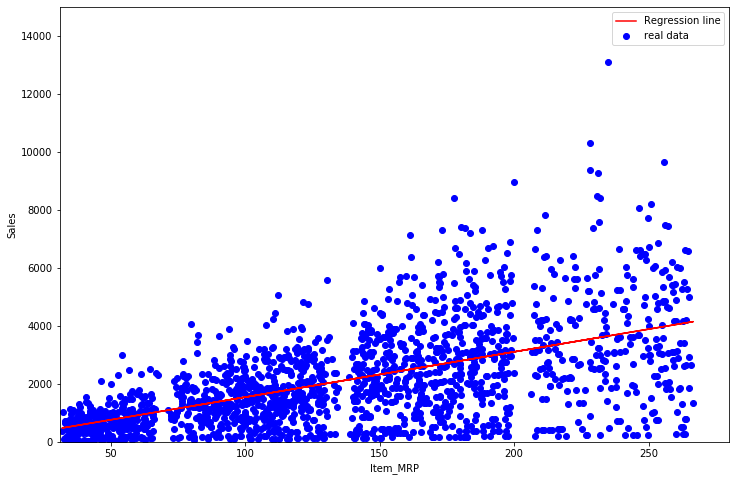

In [96]:
#37 สร้าง scatter plot และ prediction line ของ simple linear regression
fig =plt.figure(figsize=(12,8))
plt.scatter(X_test, y_test, color='blue', label='real data')
plt.plot(X_test, pred, color='red', label='Regression line')
plt.xlabel('Item_MRP')
plt.ylabel('Sales')
plt.legend()
plt.xlim([31,280])
plt.ylim([0,15000])

In [117]:
#38 สร้างโมเดลแบบ Support Vector Regression แบบ rbf โดยใช้ Item_MRP เป็น independent variable เพียงตัวเดียว (ทำข้อ 39 ก่อน)
#39 ใช้ Standard Scaler ในการทำ feature scaling ทั้งแกน X และ Y
X = df_new['Item_MRP']
y = df_new['Item_Outlet_Sales']

X = np.array(X).reshape(-1,1)
y = np.array(y).reshape(-1,1)

from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
sc_y = StandardScaler()

X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=70)

In [120]:
#จับคู่ X_test, y_test เพื่อdata visualizaiton SVR
X_test.flatten()

array([ 1.45019381,  0.75843177, -0.74435089, ...,  0.83272589,
       -0.67855184, -0.96883914])

In [122]:
pair = dict(zip(X_test.flatten(), y_test.flatten()))

In [123]:
pair = dict(sorted(pair.items()))
pair

{-1.7509957881996916: -1.0594090728096455,
 -1.7493899148928256: -0.6813263322280321,
 -1.7429664216653622: -1.218601805686114,
 -1.7365429284378988: -0.9002163399331766,
 -1.7349370551310328: -1.218601805686114,
 -1.7343878464600846: -1.200263427143972,
 -1.7322745171882492: -0.8522244131101235,
 -1.7296119792454658: -0.9060690139359879,
 -1.7285135619035694: -0.8604181567140593,
 -1.7269076885967034: -1.019610889590528,
 -1.724794359324868: -0.9060690139359879,
 -1.7236959419829718: -1.1589045308574384,
 -1.7124965815408892: -1.1308116956439438,
 -1.710341499563075: -0.988786806509055,
 -1.7092848349271574: -1.0676028164135813,
 -1.7082281702912396: -1.2568392758378149,
 -1.7076789616202916: -0.8569065523123727,
 -1.7060313356074472: -0.8206199734949422,
 -1.7044254623005812: -1.019610889590528,
 -1.7028195889937152: -0.6216290573993563,
 -1.7023121330287456: -1.1335429435119224,
 -1.70070625972188: -1.0715045990821221,
 -1.6996495950859623: -0.8147672994921308,
 -1.6980437217790965:

In [129]:
X_test = np.array(list(pair.keys())).reshape(-1,1)
X_test

array([[-1.75099579],
       [-1.74938991],
       [-1.74296642],
       ...,
       [ 1.99070508],
       [ 2.00245364],
       [ 2.0169065 ]])

In [130]:
y_test = np.array(list(pair.values())).reshape(-1,1)
y_test

array([[-1.05940907],
       [-0.68132633],
       [-1.21860181],
       ...,
       [-0.19672492],
       [ 0.27461042],
       [-0.50184433]])

In [131]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X_train, y_train)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [132]:
pred_svr = regressor.predict(X_test)

In [133]:
pred_svr = sc_y.inverse_transform(pred_svr)
pred_svr

array([ 502.38452888,  503.02217385,  505.63924714, ..., 3860.68978964,
       3855.29169907, 3848.01326554])

In [134]:
y_test = sc_y.inverse_transform(y_test)
y_test

array([[ 373.5138],
       [1018.674 ],
       [ 101.8674],
       ...,
       [1845.5976],
       [2649.884 ],
       [1324.942 ]])

In [135]:
#40 ทดสอบโมเดลวัดค่า MAE, MSE, RMSE และ R2
print('MAE: ', mean_absolute_error(y_test, pred_svr))
print('MSE: ', mean_squared_error(y_test, pred_svr))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, pred_svr)))
print('R2 score: ', r2_score(y_test, pred_svr))

MAE:  1016.9995965647479
MSE:  1951875.0529659581
RMSE:  1397.0952197205308
R2 score:  0.321829706841514


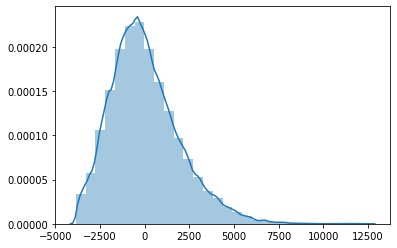

In [136]:
#41 สร้าง distribution plot ของผลต่างระหว่าง y_test กับ predicted results และอธิบายความหมาย
sns.distplot((y_test - pred_svr), bins=30)

(0, 15000)

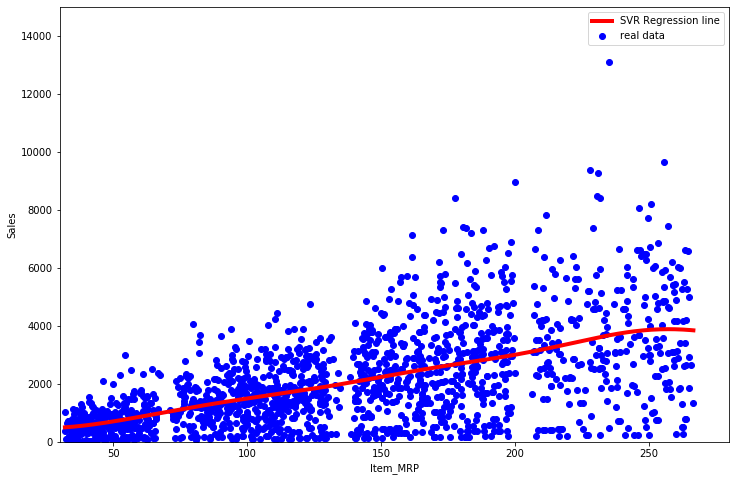

In [140]:
#42 สร้าง scatter plot และ prediction line ของ RBF support vector regressor
fig =plt.figure(figsize=(12,8))
plt.scatter(sc_X.inverse_transform(X_test), y_test, color='blue', label='real data')
plt.plot(sc_X.inverse_transform(X_test), pred_svr, color='red', label='SVR Regression line', linewidth=4)
plt.xlabel('Item_MRP')
plt.ylabel('Sales')
plt.legend()
plt.xlim([30,280])
plt.ylim([0,15000])